# Class 3 on spatial  networks
1. Spatial networks generation
2. OSMNX package and calls (if we have time)

For osmnx you will need geopandas to be installed.
If you run into troubles, do it online in google colab.


Let us load the data. This is the most standard visulisation of spatial data we can find.


In [ ]:
# Analysis of global mobility patterns


# Import the pandas library.
import pandas
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# convert dat file to csv
# read flash.dat to a list of lists
print('reading airports')

# Read in the airports data.
airports = pd.read_csv('airports.dat', header=None, dtype=str)#("C:/Users/lyubo/Documents/DATA_networks/mobilitydata/openflights/airports.dat", header=None, dtype=str)
airlines = pd.read_csv('airlines.dat', header=None, dtype=str)
routes = pd.read_csv('routes.dat', header=None, dtype=str)


airports.columns = ["id", "name", "city", "country", "code", "icao", "latitude", "longitude", "altitude", "offset", "dst", "timezone", "type", "nametype"]
# Read in the airlines data.airlines = pandas.read_csv("airlines.csv", header=None, dtype=str)
print('reading airlines')
airlines.columns = ["id", "name", "alias", "iata", "icao", "callsign", "country", "active"]

# Read in the routes data.routes = pandas.read_csv("routes.csv", header=None, dtype=str)
print('reading routes')
routes.columns = ["airline", "airline_id", "source", "source_id", "dest", "dest_id", "codeshare", "stops", "equipment"]

print("data loading finished")
airports.head()


reading airports
reading airlines
reading routes
data loading finished


,id,name,city,country,code,icao,latitude,longitude,altitude,offset,dst,timezone,type,nametype
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081689834590001,145.391998291,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.20707988739,145.789001465,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826789855957031,144.29600524902344,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380355834961,147.22000122070312,146,10,U,Pacific/Port_Moresby,airport,OurAirports


In [ ]:
airport_source = routes['source_id'].value_counts()
airport_dest = routes['dest_id'].value_counts()
traffic = pd.DataFrame(columns = ['source_id', 'dest_id','sumtraffic'])
traffic['source_id'] = airport_source
traffic['dest_id'] = airport_dest
traffic = traffic.fillna(0)
traffic['dest_id'] = traffic['dest_id'].astype('int64')
traffic['dest_id'] = traffic['dest_id'].astype('int64')
traffic['sumtraffic'] = traffic.apply(lambda x: x['source_id'] + x['dest_id'], axis=1)
traffic.head()



traffic['id'] = traffic.index
traffic['id'] =traffic['id']
traffic.head()

,source_id,dest_id,sumtraffic,id
3682,915,911,1826,3682
3830,558,550,1108,3830
3364,535,534,1069,3364
507,527,524,1051,507
1382,524,517,1041,1382


In [ ]:
traffic_final = airports.merge(traffic, on="id", how = 'inner')
traffic_final.head(3)

# here more preprocessing can be done

,id,name,city,country,code,icao,latitude,longitude,altitude,offset,dst,timezone,type,nametype,source_id,dest_id,sumtraffic
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081689834590001,145.391998291,5282,10,U,Pacific/Port_Moresby,airport,OurAirports,5,5,10
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.20707988739,145.789001465,20,10,U,Pacific/Port_Moresby,airport,OurAirports,8,8,16
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826789855957031,144.29600524902344,5388,10,U,Pacific/Port_Moresby,airport,OurAirports,10,12,22


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

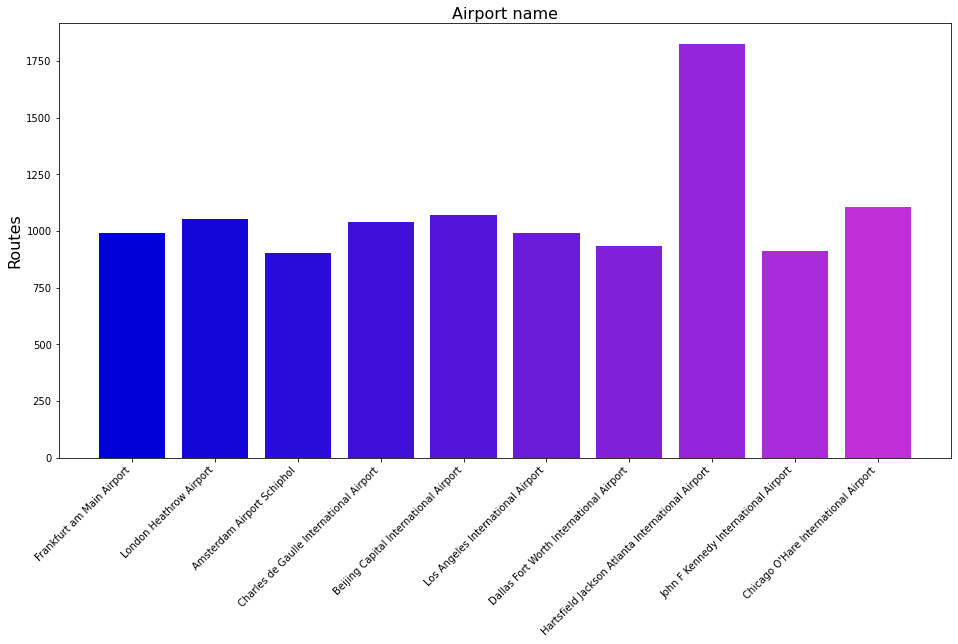

In [ ]:
traffic_top= traffic_final.loc[traffic_final['sumtraffic'] > 900]

# Set color transparency (0: transparent; 1: solid)
a = 0.4
# Create a colormap
customcmap = [(x/12.0,  x/48.0, 0.85) for x in range(len(traffic_top))]

# Create a figure of given size
fig = plt.figure(figsize=(16,8))
# Add a subplot
ax = fig.add_subplot(111)
# Plot
ax.bar(traffic_top['name'], traffic_top['sumtraffic'],color=customcmap)
# Set x axis label on top of plot, set label text
ax.xaxis.set_label_position('top')
xlab = 'Airport name'
ax.set_xlabel(xlab, fontsize=16)
# Set y axis label, set label text
ylabel = 'Routes'
ax.set_ylabel(ylabel, fontsize=16)
# Labels rotation


plt.xticks(rotation=45, ha='right')


In [ ]:
import folium
m = folium.Map(location=[48.86, 2.33],zoom_start=2 )
for i in range(0,len(traffic_final)):
    lat = traffic_final.iloc[i]['latitude']
    lon = traffic_final.iloc[i]['longitude']
    name = traffic_final.iloc[i]['name']
    size = traffic_final.iloc[i]['sumtraffic']
    folium.CircleMarker([lat, lon], radius=size/50,color='red' , popup=name+'<br>Routes : '+str(size),
        fill_color='red').add_to(m)
m

# Spatial networks

@Liubov, Marc (CRI)

Course from Big data course at CRI 2019 https://github.com/Big-data-course-CRI/materials_big_data_cri_2019

In today's course we will speak about spatial networks, where nodes and links have specified locations (coordinates).
There are various examples of such networks in life:
1. Roads networks
2. Airport networks
3. Biological tree networks
4. River networks

Today we will learn how to visualise such networks and how to calculate particular properties of such networks.
For more details about such networks you can look at the literature [1,2].


## Airport travel networks

We start with visualising spatially embedded data of airport travel networks.
We use openflights open data https://openflights.org/data.html#airline. There are many ways of visualising it and making statistics of airports connections:
    1. counting lengths of connections
    2. finding hubs etc.


## How do we visualize a spatial airport network?
It is very simple.
In our network we will have nodes, airports and routes be our links in the travel network.


    [1] M.Barthelemy "Spatial networks" https://arxiv.org/pdf/1010.0302.pdf
    [2] M.C. Gonzalez, C.A. Hidalgo, and A.-L. Barabasi  "Understanding  individual  human  mobility  patterns" Na-ture, 453:779 – 782, 2009. https://www.ncbi.nlm.nih.gov/pubmed/18528393




## Open street map analysis  
For osmnx you will need geopandas to be installed.
If you run into troubles, do it online in google colab.

Here we show scrapping of open street map.

**Note:**
place_name should be polygon
place_name = "Uttar Pradesh, India"

For any questions ask osmnx community https://github.com/gboeing/osmnx

In [ ]:
pip install osmnx

     |████████████████████████████████| 95 kB 2.9 MB/s 
     |████████████████████████████████| 6.3 MB 32.4 MB/s 
     |████████████████████████████████| 1.0 MB 48.6 MB/s 
     |████████████████████████████████| 11.2 MB 42.9 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 15.7 MB 52.9 MB/s 
     |████████████████████████████████| 11.3 MB 55.1 MB/s 
     |████████████████████████████████| 994 kB 44.6 MB/s 
     |████████████████████████████████| 15.4 MB 51.5 MB/s 
     |████████████████████████████████| 890 kB 71.2 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
 

loading graph of city


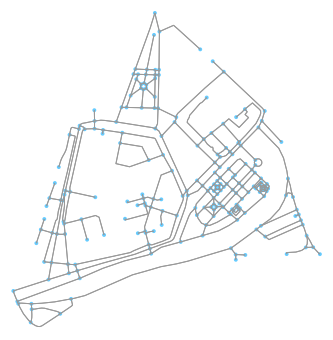

loading places
There are restaurants in this area, number = 
0


In [ ]:
import json # requests for APIs
import requests #load Python code that allow us to work with the JSON data format and the HTTP protocol
import osmnx as ox
import matplotlib.pyplot as plt
%matplotlib inline

# https://www.digitalocean.com/community/tutorials/how-to-use-web-apis-in-python-3
# https://automating-gis-processes.github.io/CSC/notebooks/L3/retrieve_osm_data.html


# Specify the name that is used to seach for the data
place_name =  "Kremlin, Moscow, Russia" # "Uttar Pradesh, India"# "Kamppi, Helsinki, Finland"


# Fetch OSM street network from the location
graph = ox.graph_from_place(place_name)
type(graph)

print('loading graph of city')

# Plot the streets
fig, ax = ox.plot_graph(graph)


# Retrieve the footprint of our location
area = ox.gdf_from_place(place_name)
print('loading places')

# Retrieve buildings from the area
#buildings = ox.footprints(place_name) #buildings_from_place(place_name)

# What types are those? if there is any information about buildings_from_place
#print(type(area))
#print(type(buildings))

# Retrieve restaurants
restaurants = ox.pois_from_place(place_name, amenities=['restaurant'])

#schools = ox.pois_from_place(place_name, amenities=['school'])


# How many schools do we have in this district?
print('There are restaurants in this area, number = ')
print(len(restaurants))

# Show information about amenities

In [ ]:
# Select some useful cols and print about schools

cols = ['access', 'contact:email', 'contact:phone',
        'addr:housenumber', 'addr:street'] #, 'addr:postcode' 'addr:country',
# Print only selected cols
restaurants[cols].head(10)
